<a href="https://colab.research.google.com/github/vendyliang/MachineLearningProjects/blob/master/User_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **User Churn Analysis**

I used a Telecommunication company user dataset in this project for user churn analysis. 

There are 2 objectives:

- In this project, I will build supervised machine learning models in Python to identify customers who are likely to stop using service in the future. This will provide insights for business teams to make promotion campaign and avoid user acquisition costs.

- In order to improve user retention, I will also analyze top factors that influence user retention for further discussion.

## Contents


* Part 1: Exploratory Data Analysis
* Part 2: Feature Preprocessing
* Part 3: Model Training and Results Evaluation
* Part 4: Feature Selection

# Part 0: Setup Google Drive Environment

In [0]:
#install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1wvKi-E6GJnRqAkYMpVPaRc0L0XgY0Wkq'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
file.GetContentFile('churn.csv')

# Part 1: Exploratory Data Analysis

### Part 1.1: Understand the Raw Dataset

In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

churn_df = pd.read_csv('churn.csv')

In [5]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

Num of rows: 5000
Num of columns: 21


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

### Part 1.2: Data cleaning

I check for both duplication and missing values. 
Result: There is no duplication. There are zeros in multiple columns but I assume them to be informative zeros, which mean some users didn't use any services at all.

In [29]:
#check missing values - null
churn_df.isnull().sum(axis = 0)

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [32]:
#check missing values - zeros
churn_df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,100.259,436.911,7.755,180.289,100.029,30.650,200.637,100.191,17.054,200.392,99.919,9.018,10.262,4.435,2.771,1.570
std,39.695,42.209,13.546,53.895,19.831,9.162,50.551,19.826,4.297,50.528,19.959,2.274,2.761,2.457,0.746,1.306
min,1.000,408.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,73.000,408.000,0.000,143.700,87.000,24.430,166.375,87.000,14.140,166.900,87.000,7.510,8.500,3.000,2.300,1.000
50%,100.000,415.000,0.000,180.100,100.000,30.620,201.000,100.000,17.090,200.400,100.000,9.020,10.300,4.000,2.780,1.000
75%,127.000,415.000,17.000,216.200,113.000,36.750,234.100,114.000,19.900,234.700,113.000,10.560,12.000,6.000,3.240,2.000
max,243.000,510.000,52.000,351.500,165.000,59.760,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000


In [35]:
#check duplication
churn_df['phone_number'][churn_df['phone_number'].duplicated()]

Series([], Name: phone_number, dtype: object)

There are 16 numeric features and 5 categorical features.

I check the 5 columns that are categorical features: state, phone_number, intl_plan, voice_mail_plan, and churned columns.

- Remove Extra Whitespace for 3 columns: intl_plan, voice_mail_plan, and churned

In [16]:
#before removal
churn_df['voice_mail_plan'][0]

' yes'

In [0]:
#remove the heading and trailing whitespaces
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].apply(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].apply(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].apply(lambda x: x.strip())

In [20]:
#after removal
churn_df['voice_mail_plan'][0]

'yes'

- Remove the dot following 'False' and 'True'

In [21]:
#before removal
churn_df['churned'][0]

'False.'

In [0]:
#remove the dot
churn_df['churned'].replace('False.', 'False', inplace = True)
churn_df['churned'].replace('True.', 'True', inplace = True)

In [24]:
#after removal
churn_df['churned'][0]

'False'

### Part 1.3:  Understand the features

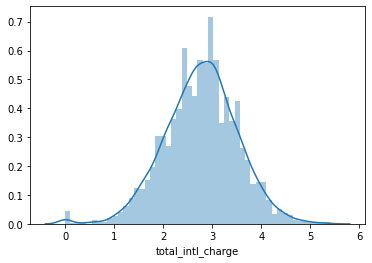

In [41]:
# check the feature distribution
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(churn_df['total_intl_charge'])

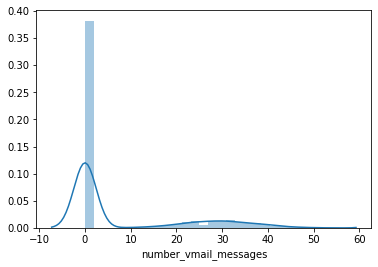

In [37]:
sns.distplot(churn_df['number_vmail_messages'])

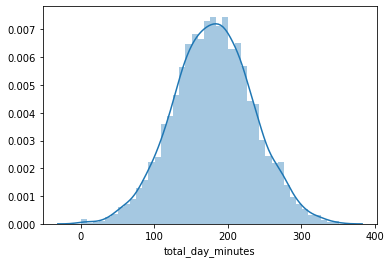

In [38]:
sns.distplot(churn_df['total_day_minutes'])

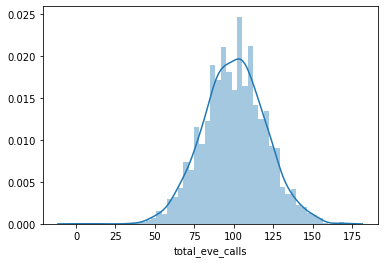

In [39]:
sns.distplot(churn_df['total_eve_calls'])

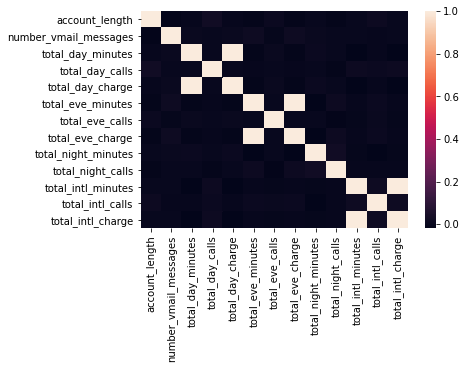

In [42]:
# correlations between all the features
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

In [43]:
# check the actual values of correlations
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000,-0.015,-0.001,0.028,-0.001,-0.010,0.009,-0.010,0.001,-0.008,0.001,0.014,0.001
number_vmail_messages,-0.015,1.000,0.005,0.001,0.005,0.019,-0.004,0.019,0.006,0.003,0.002,0.000,0.003
total_day_minutes,-0.001,0.005,1.000,0.002,1.000,-0.011,0.008,-0.011,0.012,0.004,-0.019,-0.001,-0.019
total_day_calls,0.028,0.001,0.002,1.000,0.002,-0.001,0.004,-0.001,0.003,-0.008,0.013,0.011,0.013
total_day_charge,-0.001,0.005,1.000,0.002,1.000,-0.011,0.008,-0.011,0.012,0.004,-0.019,-0.001,-0.019
total_eve_minutes,-0.010,0.019,-0.011,-0.001,-0.011,1.000,0.003,1.000,-0.017,0.013,0.000,0.008,0.000
total_eve_calls,0.009,-0.004,0.008,0.004,0.008,0.003,1.000,0.003,0.002,-0.014,-0.007,0.006,-0.008
total_eve_charge,-0.010,0.019,-0.011,-0.001,-0.011,1.000,0.003,1.000,-0.017,0.013,0.000,0.008,0.000
total_night_minutes,0.001,0.006,0.012,0.003,0.012,-0.017,0.002,-0.017,1.000,0.027,-0.007,-0.017,-0.007
total_night_calls,-0.008,0.003,0.004,-0.008,0.004,0.013,-0.014,0.013,0.027,1.000,0.000,-0.000,0.000


Text(0.5, 0, 'states')

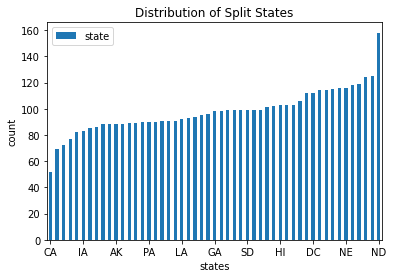

In [45]:
#understand subcategories of 'state' column
bar_state = pd.get_dummies(churn_df['state']).sum()

#KS                   1
#OH                   3
#OK                   3

bar_state.sort_values(ascending=True).plot.bar(label = 'state')
plt.title('Distribution of Split States')
plt.legend(loc = 'upper left')
plt.xticks(np.arange(0, 51, step=5), rotation = 0)
plt.ylabel('count')
plt.xlabel('states')

# Part 2: Feature Preprocessing

### Part 2.1: Get ground truth data and convert data types to numerical or boolean for next steps

In [46]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,OH,107,415,371-7191,no,yes,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,NJ,137,415,358-1921,no,no,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,OH,84,408,375-9999,yes,no,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,OK,75,415,330-6626,yes,no,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [0]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True', 1, 0)

# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan", "voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

In [48]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[14.14]


comment: I removed the 'state' column in further analysis due to the time constraint but I wanted to understand how 'state' has an influence in our feature matrix. I vectorized 50 more columns for each and every state with one-hot-encoding but that would create too many features for now. Implementing different methods of encoding would be the next improvement

In [0]:
# for reference only
to_drop_state = ['area_code','phone_number','churned']
churn_feat_space_state = churn_df.drop(to_drop_state, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space_state[yes_no_cols] = churn_feat_space_state[yes_no_cols] == 'yes'

# sklearn.preprocessing.OneHotEncoder
churn_feat_space_state = pd.get_dummies(churn_feat_space_state, columns=['state'])

churn_feat_space_state.head()

### Part 2.2: Split dataset into training and testing

In [49]:
# Split the data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 4000 observation with 17 features
test data has 1000 observation with 17 features


In [0]:
# Feb follow-up
# Split the data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_up_train, X_up_test, y_train, y_test = model_selection.train_test_split(X_update, y, test_size=0.2)

print('training data has ' + str(X_up_train.shape[0]) + ' observation with ' + str(X_up_train.shape[1]) + ' features')
print('test data has ' + str(X_up_test.shape[0]) + ' observation with ' + str(X_up_test.shape[1]) + ' features')

training data has 4000 observation with 21 features
test data has 1000 observation with 21 features


### Part 2.3: Feature Scaling

#### Part 2.3.1: Standardization

In [0]:
# Scale the data using standardization

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [51]:
X_train_std

array([[ 0.16819926, -0.32352314,  1.67076904, ..., -1.39125586,
         0.26928557,  0.32542454],
       [-0.33569307, -0.32352314, -0.59852677, ...,  0.22624841,
        -0.98578267,  1.08709694],
       [ 0.94923236, -0.32352314, -0.59852677, ..., -1.39125586,
         0.48291421, -1.19792028],
       ...,
       [-0.58763923, -0.32352314,  1.67076904, ..., -0.17812766,
         1.81809319,  2.61044175],
       [-0.13413614, -0.32352314, -0.59852677, ..., -0.98687979,
        -0.51847003, -0.43624787],
       [ 0.3949508 , -0.32352314, -0.59852677, ..., -0.98687979,
        -0.85226477,  1.08709694]])

####Part 2.3.2: Normalization

In [0]:
# Scale the data using normalization

from sklearn.preprocessing import MinMaxScaler
nor_scaler = MinMaxScaler()
X_train_nor = nor_scaler.fit_transform(X_train)
X_test_nor = nor_scaler.transform(X_test)

In [53]:
X_train_nor

array([[0.43801653, 0.        , 1.        , ..., 0.05      , 0.55      ,
        0.22222222],
       [0.3553719 , 0.        , 0.        , ..., 0.25      , 0.37592593,
        0.33333333],
       [0.5661157 , 0.        , 0.        , ..., 0.05      , 0.57962963,
        0.        ],
       ...,
       [0.31404959, 0.        , 1.        , ..., 0.2       , 0.76481481,
        0.55555556],
       [0.38842975, 0.        , 0.        , ..., 0.1       , 0.44074074,
        0.11111111],
       [0.47520661, 0.        , 0.        , ..., 0.1       , 0.39444444,
        0.33333333]])

In [0]:
# Feb follow-up
# Scale the data using normalization

from sklearn.preprocessing import MinMaxScaler
nor_scaler = MinMaxScaler()
X_up_train_nor = nor_scaler.fit_transform(X_up_train)
X_up_test_nor = nor_scaler.transform(X_up_test)

# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training and Selection

In [0]:
#build models for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

#### Group 1: Standardized data sets

In [66]:
# Train the model
classifier_logistic.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
classifier_RF.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
classifier_KNN.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
# Use 5-fold Cross Validation to select model based on accuracy 
# note: the machine either correctly classify or doesn't so we use classification score, not mean squared error
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train_std, y_train, cv=5, scoring = 'accuracy')
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.8675  0.86875 0.86875 0.8675  0.8425 ]
Model accuracy of Logistic Regression is 0.8630000000000001
[0.9075  0.9     0.89125 0.89375 0.90125]
Model accuracy of KNN is 0.89875
[0.95375 0.9575  0.9525  0.95625 0.95625]
Model accuracy of Random Forest is 0.95525


#### Group 2: Normalized data sets

In [0]:
model_name = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
  cv_score = model_selection.cross_val_score(classifier, X_train_nor, y_train, cv = 5, scoring = 'accuracy')
  print(cv_score)
  print('Model accuracy of ', model_name[count], ' is ', str(cv_score.mean()))
  count += 1

[0.8675  0.87875 0.87    0.8675  0.8475 ]
Model accuracy of  Logistic Regression  is  0.86625
[0.89875 0.8975  0.89375 0.9     0.89125]
Model accuracy of  KNN  is  0.89625
[0.95625 0.94875 0.96125 0.96375 0.95125]
Model accuracy of  Random Forest  is  0.95625


Based on cross validation performance results (accuracy), the Random Forest model has the highest accuracy among the 3 models.

We can also see that while difference between the 2 scaling methods is small,Standardized results are still better than normalized ones. Thus I will use standardized dataset moving forward.

### Part 3.2: Penalized Regression with Grid Search to Find Optimal Hyperparameters

Logistic regression has lowest accuracy during the model selection step and lowest recall rate in the model evaluation step. I'd like to try to optimize the result with penalized logistic regression models.

In [0]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(model):
    print ("Best score: " + str(model.best_score_))
    print ("Best parameters set:")
    best_parameters = model.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [71]:
# hyperparamter tuning
# Penalty is choosed from either L1 or L2
# C is the lambda value(weight) for L1 and L2

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(), parameters, cv=5)
Grid_LR.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 5, 10),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.86625
Best parameters set:
C:0.01
penalty:l2


In [0]:
# best model
classifier_Grid_LR = Grid_LR.best_estimator_

Add Polynomial features to Ridge Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

In [74]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 0.1, 1, 5, 10)
}
Grid_LR_poly = GridSearchCV(LogisticRegression(), parameters, cv=5)
Grid_LR_poly.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 5, 10),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR_poly)

Best score: 0.917
Best parameters set:
C:5
penalty:l2


In [0]:
# best model
classifier_Grid_LR_poly = Grid_LR_poly.best_estimator_

###Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

The class of interest is positive (churned).

True Positive (tp): correctly labeled real churn

Precision: tp / (tp + fp)
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall: tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [0]:
from sklearn.metrics import confusion_matrix

# calculate accuracy, precision and recall, [[tn, fp],[fn, tp]]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.956
precision is: 0.911504424778761
recall is: 0.7518248175182481


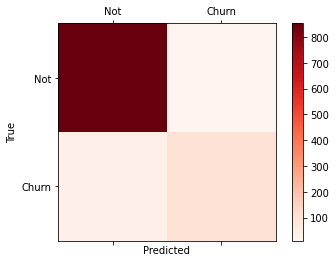

Logistic Regression
Accuracy is: 0.867
precision is: 0.5416666666666666
recall is: 0.1897810218978102


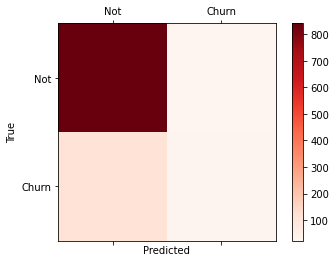

KNN
Accuracy is: 0.895
precision is: 0.75
recall is: 0.35036496350364965


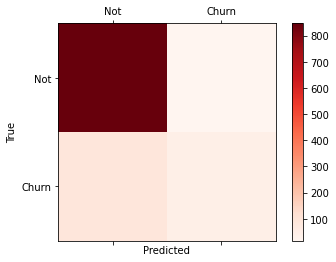

In [79]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest, logistic regression and KNN
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, classifier_RF.predict(X_test_std))),
    ("Logistic Regression", confusion_matrix(y_test, classifier_logistic.predict(X_test_std))),
    ("KNN", confusion_matrix(y_test, classifier_KNN.predict(X_test_std)))
]

draw_confusion_matrices(confusion_matrices)

There are 14% churned users so the data is a little bit imbalanced. However, the Random Forest model does a good job in terms of recall metric (0.78), which is better than Logistic Regression (0.24) and KNN (0.37).

Penalized Logistic Regression (L2)
Accuracy is: 0.869
precision is: 0.59375
recall is: 0.1386861313868613


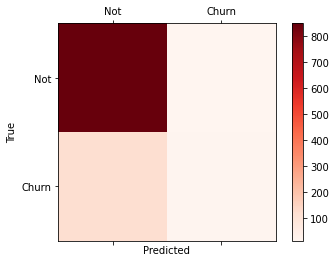

In [101]:
%matplotlib inline

confusion_matrices_up = [
    ("Penalized Logistic Regression (L2)", confusion_matrix(y_test, classifier_Grid_LR.predict(X_test_std))),
]

draw_confusion_matrices(confusion_matrices_up)

In the attempt to improve the logistic regression model in terms of accuracy, precision, and recall metric, I added regularization into the regression model. However, only precision improved from 0.51 to 0.59. Accuracy and recall decreased. 

Ridge Regression with Polynomial Features
Accuracy is: 0.926
precision is: 0.8058252427184466
recall is: 0.6058394160583942


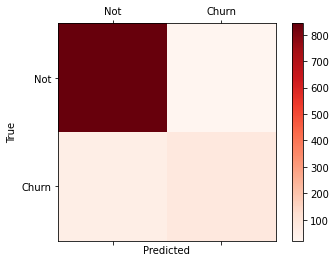

In [80]:
confusion_matrices_poly = [
    ("Ridge Regression with Polynomial Features", confusion_matrix(y_test, classifier_Grid_LR_poly.predict(X_test_poly))),
]

draw_confusion_matrices(confusion_matrices_poly)

To further optimize the Logistic Regression model beyond adding regularization, I added polynomial features to the dataset. The number of features increased from 17 to 171. Accuracy is now higher than that of the LR model and Ridge model. Precision and recall has improved significantly. 

Although the logistic model is improved, it still cannot beat the Random Forest model. Therefore, the RF is still the best model for predicting the user churn classification.

### Part 3.4: Model Evaluation - ROC & AUC

We also evaluate the 3 models from the machine stand point, regardless of the cutoff. RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function.

#### Part 3.4.1: ROC of Ridge Regrssion with Polynomial Features

In [0]:
y_pred_proba_lrpp = classifier_Grid_LR_poly.predict_proba(X_test_poly)[:, 1]
fpr_lrpp, tpr_lrpp, _ = roc_curve(y_test, y_pred_proba_lrpp)

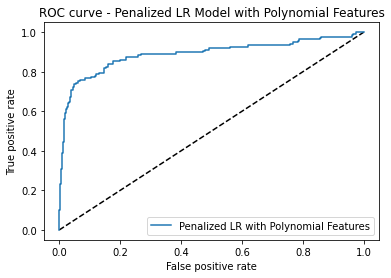

AUC score is: 0.8891153758320577


In [88]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lrpp, tpr_lrpp, label='Penalized LR with Polynomial Features')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Penalized LR Model with Polynomial Features')
plt.legend(loc='best')
plt.show()

print ("AUC score is: " + str(metrics.auc(fpr_lrpp, tpr_lrpp)))

In [89]:
# AUC score
metrics.auc(fpr_lrpp, tpr_lrpp)

0.8891153758320577

#### Part 3.4.2: ROC of Random Forest Model

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_proba_rf = classifier_RF.predict_proba(X_test_std)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

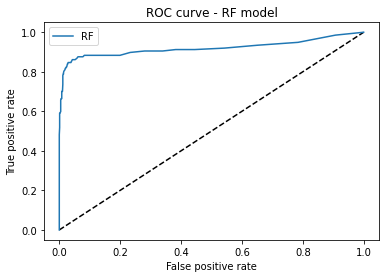

AUC score is: 0.9197926093833257


In [85]:
# draw ROC curve of Random Forest
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

print ("AUC score is: " + str(metrics.auc(fpr_rf,tpr_rf)))

In [90]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9197926093833257

#### Part 3.4.3: ROC of KNN Model

In [0]:
# Use predict_proba to get the probability results of KNN
y_pred_proba_knn = classifier_KNN.predict_proba(X_test_std)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

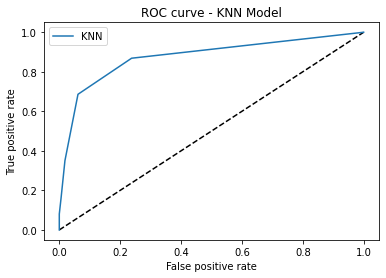

AUC score is: 0.8754599047627103


In [92]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc = 'best')
plt.show()

print ("AUC score is: " + str(metrics.auc(fpr_knn, tpr_knn)))

In [93]:
# AUC score
metrics.auc(fpr_knn, tpr_knn)

0.8754599047627103

In terms of ROC and AUC, the Random Forest model outstands the other 2 models, followed by KNN then Logistic Regression model.

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The correlated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

Part 4.1.1: Add L1 regularization to logistic regression and check the coef for feature selection

In [94]:
scaler = StandardScaler()
X_std_l1 = scaler.fit_transform(X)
LRmodel_l1 = LogisticRegression(penalty='l1', C = 0.1, solver = 'saga')
LRmodel_l1.fit(X_std_l1, y)
LRmodel_l1.coef_[0]

print ("Logistic Regression (L1) Coefficients")
for coef, col_name in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key = lambda pair:(abs(pair[0])), reverse = True):
    print (col_name, ": \t", str(coef))

Logistic Regression (L1) Coefficients
number_customer_service_calls : 	 0.6468
intl_plan : 	 0.5929
voice_mail_plan : 	 -0.4415
total_day_minutes : 	 0.3662
total_day_charge : 	 0.3366
total_eve_charge : 	 0.1692
total_eve_minutes : 	 0.1597
total_intl_calls : 	 -0.1494
total_intl_charge : 	 0.1179
total_night_minutes : 	 0.1005
total_intl_minutes : 	 0.0996
total_night_charge : 	 0.0758
account_length : 	 0.0356
total_day_calls : 	 0.0307
total_night_calls : 	 -0.0111
total_eve_calls : 	 -0.0091
number_vmail_messages : 	 0.0


Part 4.1.2: Add L2 regularization to logistic regression and check the coef for feature selection

In [95]:
scaler = StandardScaler()
X_std_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1)
LRmodel_l2.fit(X_std_l2, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]))):
    print (v + ": \t" + str(k))

Logistic Regression (L2) Coefficients
number_customer_service_calls: 	0.6604
voice_mail_plan: 	-0.6199
intl_plan: 	0.6039
total_day_minutes: 	0.3626
total_day_charge: 	0.3621
total_eve_charge: 	0.1766
total_eve_minutes: 	0.1764
total_intl_calls: 	-0.1715
number_vmail_messages: 	0.1659
total_intl_charge: 	0.1204
total_intl_minutes: 	0.12
total_night_minutes: 	0.0997
total_night_charge: 	0.0992
account_length: 	0.0548
total_day_calls: 	0.0501
total_night_calls: 	-0.0313
total_eve_calls: 	-0.0296



### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [96]:
# check feature importance of random forest for feature selection

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for importance, col_name in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (col_name + ": \t" + str(importance))

Feature importance ranking by Random Forest Model:
total_day_minutes: 	0.1437
total_day_charge: 	0.142
number_customer_service_calls: 	0.1167
intl_plan: 	0.0865
total_eve_charge: 	0.0656
total_eve_minutes: 	0.065
total_intl_calls: 	0.0593
total_intl_minutes: 	0.0446
total_intl_charge: 	0.0412
total_night_charge: 	0.0398
total_night_minutes: 	0.0392
number_vmail_messages: 	0.0302
account_length: 	0.0286
total_day_calls: 	0.0276
total_night_calls: 	0.0262
total_eve_calls: 	0.0226
voice_mail_plan: 	0.0213


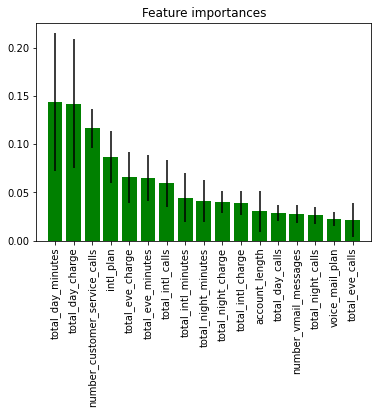

In [100]:
# Plot the feature importances of the forest
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ['total_day_minutes', 'total_day_charge', 'number_customer_service_calls', 'intl_plan', \
                               'total_eve_charge', 'total_eve_minutes', 'total_intl_calls', 'total_intl_minutes', 'total_night_minutes', \
                               'total_night_charge', 'total_intl_charge', 'account_length', 'total_day_calls', 'number_vmail_messages',  \
                               'total_night_calls', 'voice_mail_plan', 'total_eve_calls'], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature imporance summay:

Among the correlated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge), the (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge) have higher coefficient/importance.

In addition, we can see that number_customer_service_calls and intl_plan are also importance features

